In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('apple_quality.csv')

In [5]:
df.head(20)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


In [6]:
x = df.iloc[:,1:8]
y = np.array([1 if i == 'good' else 0 for i in df['Quality']], dtype='float')
x_train = x.iloc[:3000, :]
x_test = x.iloc[3000:, :]
y_train = y[:3000]
y_test = y[3000:]

In [7]:
x_train

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984
...,...,...,...,...,...,...,...
2995,0.951363,-2.565243,2.344982,2.640555,-3.296170,-0.297230,1.491628
2996,-0.583026,0.097493,0.357052,-0.211640,-1.250563,1.841531,-1.998825
2997,1.284972,0.849862,-1.540320,0.692406,-2.283221,1.396857,2.801796
2998,-3.142309,-1.273307,-0.459076,-0.349882,0.812774,0.621236,-4.199263


In [8]:
x_train = x_train.to_numpy()

In [9]:
x_test = x_test.to_numpy()

In [10]:
y_train

array([1., 1., 0., ..., 0., 0., 1.])

In [11]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [12]:
def compute_cost(x,y,w,b):
    cost = 0
    loss = 0
    m,n = x.shape
    for i in range(m):
        z = np.dot(x[i], w) + b
        g = sigmoid(z)
        loss += -y[i]*np.log(g) - (1-y[i])*np.log(1-g)
    cost = loss/m
    return cost

In [13]:
def compute_gradient(x,y,w,b,):
    m,n = x.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0
    for i in range(m):
        z = np.dot(x[i], w) +b
        g = sigmoid(z)
        error = g - y[i]
        dj_dw += error*x[i]
        dj_db += error
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db    

In [14]:
def gradient_descent(x,y,w,b, alpha = 0.005, epoch = 3000):
    accuracies = []
    cost = []
    weight = []
    _,n= x.shape
    for i in range(epoch):
        tmp_dj_dw, tmp_dj_db = compute_gradient(x, y, w, b)
        for j in range(n):
            w[j] = w[j] - alpha * tmp_dj_dw[j]
        b = b - alpha*tmp_dj_db
        weight.append([w, b])
        accuracies.append(accuracy(x_test,y_test,w,b))
        cost.append(compute_cost(x,y,w,b))
    return weight, accuracies, cost

In [15]:
def accuracy(x, y, w, b):
    m = len(y)
    count = 0
    yhat = np.zeros([m,1])
    for i in range(m):
        f = np.dot(x[i], w) + b
        yhat[i] = 1 if f > 0.5 else 0
        if yhat[i] == y[i]: count += 1 
    acc = 100*count/m
    return acc

In [16]:
init_w = np.random.rand(7)
init_b = random.random()
init_w

array([0.71270412, 0.75890697, 0.65567679, 0.14566363, 0.50476825,
       0.16849294, 0.89544831])

In [17]:
weight, accu, cost = gradient_descent(x_train, y_train, init_w, init_b)

In [18]:
index_max = accu.index(max(accu))
w = weight[index_max][0]
b = weight[index_max][1]

In [19]:
w

array([ 0.69557264,  0.29460496,  0.62621337,  0.04604557,  0.45365358,
       -0.10049255, -0.29785197])

In [20]:
b

np.float64(0.7142330476019384)

72.7


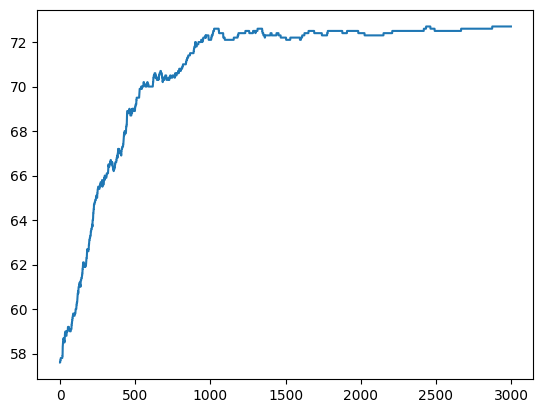

In [21]:
acc =accuracy(x_test, y_test, w, b)
print(f'{acc}')
plt.plot(accu)

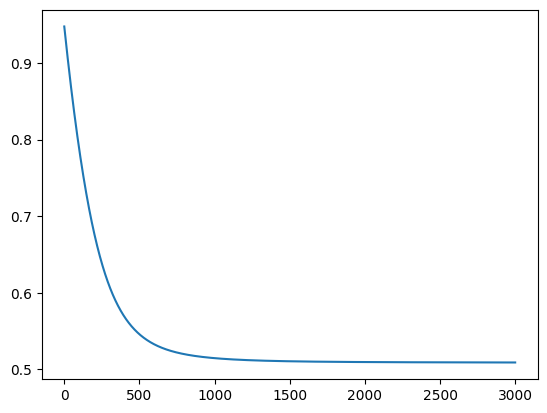

In [22]:
plt.plot(cost)